In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
path = "/home/drose/git/PhectorDB/notebooks/final_results2.csv"
df = pd.read_csv(path).sort_values("target")
df

,Unnamed: 0,target,model,embedding_time,matching_time,query_num_features,active_ligands,inactive_ligands,active_conformations,inactive_conformations,...,order_embedding_auroc,order_embedding_bedroc,order_embedding_ef0.005,order_embedding_ef0.01,order_embedding_ef0.05,cdpkit_auroc,cdpkit_bedroc,cdpkit_ef0.005,cdpkit_ef0.01,cdpkit_ef0.05
0,0,ACES,250,14.999474,0.054808,5,92,4927,1538,75809,...,0.581878,0.087815,2.173913,2.173913,1.739130,0.604824,0.104245,2.173913,1.086957,1.956522
1,1,ADA,250,9.589358,0.045996,7,59,3299,1390,49727,...,0.929902,0.541910,0.000000,6.779661,12.881355,0.947786,0.815782,54.237289,47.457630,16.610168
2,2,ANDR,250,11.788727,0.049217,6,94,4948,871,61416,...,0.730630,0.295054,10.638298,8.510638,5.957447,0.779822,0.325793,19.148935,14.893617,5.957447
3,3,EGFR,250,10.386338,0.047545,6,74,4245,1270,53327,...,0.778611,0.273213,2.702703,5.405406,5.135135,0.743762,0.196595,10.810811,8.108108,3.513514
4,4,FA10,250,5.534088,0.023962,5,25,1296,597,26306,...,0.669167,0.097072,8.000000,4.000000,0.800000,0.777747,0.187280,0.000000,8.000000,3.200000
5,5,KIT,250,7.555438,0.034208,6,48,2598,869,37914,...,0.683891,0.035050,0.000000,0.000000,0.416667,0.686105,0.112365,0.000000,2.083333,1.666667
6,6,PLK1,250,6.929119,0.032753,5,43,2150,947,33927,...,0.695760,0.066237,0.000000,0.000000,0.930233,0.748307,0.279180,0.000000,4.651163,6.976744
7,7,SRC,250,12.123919,0.056989,5,68,4046,1030,60210,...,0.754278,0.250791,8.823529,10.294118,5.000000,0.691922,0.171384,8.823529,7.352941,2.352941
8,8,THRB,250,11.128974,0.052719,7,46,2642,1114,55651,...,0.782675,0.262161,0.000000,0.000000,5.652174,0.822742,0.441968,21.739132,21.739132,7.391304
9,9,UROK,250,14.156928,0.066701,6,78,4482,1467,74747,...,0.753453,0.063546,0.000000,0.000000,0.256410,0.945400,0.684177,35.897438,26.923079,12.820513


In [36]:
df[["target", "active_ligands", "active_conformations",  "inactive_ligands", "inactive_conformations", "query_num_features"]]

,target,active_ligands,active_conformations,inactive_ligands,inactive_conformations,query_num_features
0,ACES,92,1538,4927,75809,5
1,ADA,59,1390,3299,49727,7
2,ANDR,94,871,4948,61416,6
3,EGFR,74,1270,4245,53327,6
4,FA10,25,597,1296,26306,5
5,KIT,48,869,2598,37914,6
6,PLK1,43,947,2150,33927,5
7,SRC,68,1030,4046,60210,5
8,THRB,46,1114,2642,55651,7
9,UROK,78,1467,4482,74747,6


In [39]:
df[["target", "auroc_comparison", "order_embedding_auroc", "cdpkit_auroc", "order_embedding_bedroc", "cdpkit_bedroc", "order_embedding_ef0.005", "cdpkit_ef0.005", "order_embedding_ef0.01", "cdpkit_ef0.01", "order_embedding_ef0.05", "cdpkit_ef0.05"]].to_csv("results.csv")


In [12]:
df[['target', 'embedding_time', 'matching_time', 'alignment_time']]

,target,embedding_time,matching_time,alignment_time
9,ACES,14.657525,0.077170,12.805202
2,ADA,10.265787,0.037236,21.896578
0,ANDR,13.143635,0.043732,26.589823
7,EGFR,10.613235,0.054271,25.409771
5,FA10,5.391765,0.052213,6.009293
8,KIT,7.274037,0.041111,18.611797
3,PLK1,8.388707,0.133989,8.219529
6,SRC,11.486536,0.077243,10.734247
1,THRB,12.235281,0.106184,21.552328
4,UROK,17.866752,0.162105,18.444189


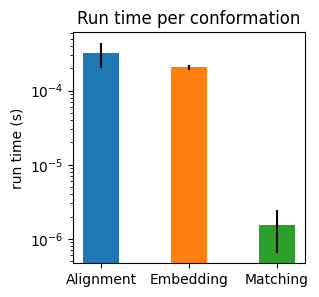

In [31]:
embedding_mean = np.mean(df['embedding_time'] / (df['active_conformations'] + df['inactive_conformations']))
embedding_std = np.std(df['embedding_time'] / (df['active_conformations'] + df['inactive_conformations']))
matching_mean = np.mean(df['matching_time'] / (df['active_conformations'] + df['inactive_conformations']))
matching_std = np.std(df['matching_time'] / (df['active_conformations'] + df['inactive_conformations']))
alignment_mean = np.mean(df['alignment_time'] / (df['active_conformations'] + df['inactive_conformations']))
alignment_std = np.std(df['alignment_time'] / (df['active_conformations'] + df['inactive_conformations']))

# Plotting the above results as bar plor
fig = plt.figure(figsize=(3, 3))
plt.bar(["Alignment", "Embedding", "Matching"], [alignment_mean, embedding_mean, matching_mean], yerr=[alignment_std, embedding_std, matching_std], width=0.4, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('run time (s)')
plt.yscale('log')
plt.title('Run time per conformation')
plt.savefig("run_time.png", dpi=300)

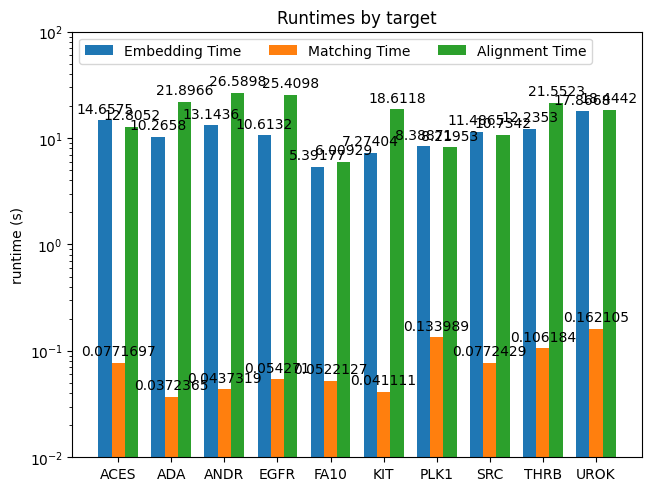

In [3]:
targets = df['target'].to_list()
runtimes = {
    'Embedding Time': df['embedding_time'].to_list(),
    'Matching Time': df['matching_time'].to_list(),
    'Alignment Time': df['alignment_time'].to_list(),
}

x = np.arange(len(targets))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in runtimes.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('runtime (s)')
ax.set_ylim(1e-2, 1e2)
ax.set_yscale('log')
ax.set_title('Runtimes by target')
ax.set_xticks(x + width, targets)
ax.legend(loc='upper left', ncols=3)

plt.show()